<a href="https://colab.research.google.com/github/KezhenLi/Final/blob/main/Final3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from numpy import array, arange, pi, sin, cos
from pylab import plot, show, xlabel, ylabel

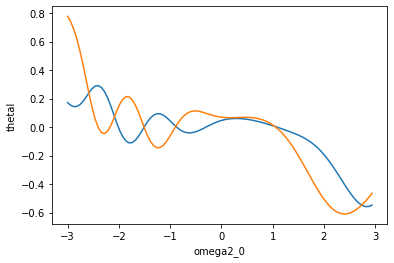

In [42]:
g = 9.81  
m = 1  
l = 1  
theta1_0 = pi / 90
theta2_0 = pi / 90
omega1_0 = 0.3
omega2_0 = 0
t_0 = 0
t_f = 50
N = 1000
h = (t_f - t_0) / N

def f(r):
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]
    f_omega1 = - (omega1 ** 2 * sin(2 * theta1 - 2 * theta2) + 2 * omega2 ** 2 * sin(theta1 - theta2) + \
                  g / l * (sin(theta1 - 2 * theta2) + 3 * sin(theta1))) / (3 - cos(2 * theta1 - 2 * theta2))
    f_omega2 = (4 * omega1 ** 2 * sin(theta1 - theta2) + omega2 ** 2 * sin(2 * theta1 - 2 * theta2) + \
                 2 * g / l * (sin(2 * theta1 - theta2) - sin(theta2))) / (3 - cos(2 * theta1 - 2 * theta2))
    return array([ omega1, f_omega1, omega2, f_omega2], float)

theta1_0 = pi / 90
theta2_0 = pi / 90
omega1_0 = 0.3
xpoints = arange(-3, 3, 0.06)
y1points = []
y2points = []

for i in xpoints:
  omega2_0 = i
  r = array([theta1_0, omega1_0, theta2_0, omega2_0], float)
  tpoints = arange(t_0, t_f, h)
  theta1_points = []
  theta2_points = []
  for t in tpoints:
    theta1_points.append(r[0])
    theta2_points.append(r[2])
    k1 = h * f(r)
    k2 = h * f(r + 0.5 * k1)
    k3 = h * f(r + 0.5 * k2)
    k4 = h * f(r + k3)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
  y1points.append(theta1_points[N-1])
  y2points.append(theta2_points[N-1])

plot(xpoints, y1points)
plot(xpoints, y2points)
xlabel('omega2_0')
ylabel('thetal')
show()
